In [10]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import tkinter as tk
from PIL import ImageTk, Image
from tkinter import filedialog, messagebox

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Ruta al dataset en Google Drive
dataset_path = '/content/drive/MyDrive/dataset'

# Cargar el dataset de entrenamiento y validación
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),  # Tamaño de entrada para la red
    batch_size=32,
    class_mode='categorical',
    subset='training'
)
val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 61 images belonging to 7 classes.
Found 13 images belonging to 7 classes.


In [6]:
# Cargar el modelo preentrenado sin la capa superior
base_model = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Congelar las capas del modelo base


# Agregar capas de clasificación
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(train_data.num_classes, activation='softmax')(x)
model = Model(base_model.input, output)

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Entrena el modelo en base a los datos de entrenamiento y validacion obtenidos con el ImageDataGenerator

In [7]:
model.fit(train_data, validation_data=val_data, epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 23s 13s/step - accuracy: 0.1848 - loss: 2.8584 - val_accuracy: 0.7692 - val_loss: 0.7829
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 274ms/step - accuracy: 0.8496 - loss: 0.6999 - val_accuracy: 0.9231 - val_loss: 0.1672
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 291ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.9231 - val_loss: 0.4065
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 283ms/step - accuracy: 0.9891 - loss: 0.0265 - val_accuracy: 0.9231 - val_loss: 0.5933
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 332ms/step - accuracy: 1.0000 - loss: 2.2439e-04 - val_accuracy: 0.7692 - val_loss: 0.6996
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 406ms/step - accuracy: 1.0000 - loss: 9.0607e-06 - val_accuracy: 0.7692 - val_loss: 0.8165
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 661ms/step - accuracy: 1.0000 - loss: 7.9168e-06 - val_accuracy: 0.7692 - val_loss: 0.9158
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 361ms/step - accuracy: 1.0000 - loss: 8.1946e-06 - val_accuracy: 0.7692 - val_l

In [8]:
#Guarda el modelo entrenado en el archivo model.h5 para usarlo despues.
model.save("model.h5")

In [19]:
img_path="iguana.jpg"

# Cargar y procesar la imagen escaneada
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)  # Añadir dimensión extra para batch

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Animal detectado: Iguana verde


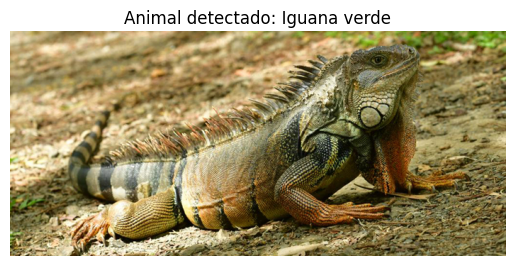

In [20]:
modelAnimales = "model.h5"

# Realizar la predicción
modelAnimales = tf.keras.models.load_model("model.h5")
prediction = modelAnimales.predict(img_array)
predicted_class_index = np.argmax(prediction)
animal_classes = list(train_data.class_indices.keys())  # Obtener nombres de las clases
detected_animal = animal_classes[predicted_class_index]

# Imprimir el nombre del animal detectado
print("Animal detectado:", detected_animal)

# Mostrar la imagen junto con el nombre del animal detectado
plt.imshow(image.load_img(img_path))
plt.title(f"Animal detectado: {detected_animal}")
plt.axis('off')  # Ocultar los ejes para una visualización más limpia
plt.show()